## Transfer Learning using VGG-19 model

In [8]:
#loading different libraries
#TensorFlow is an open-sourced end-to-end platform, a library for multiple machine learning tasks, 
#while Keras is a high-level neural network library that runs on top of TensorFlow. 
#Both provide high-level APIs used for easily building and training models
from tensorflow.keras import optimizers
from keras import losses 
from keras import metrics
import keras
from keras.models import Model
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [9]:
# data loading, augmentation is optional
#Generate batches of tensor image data with real-time data augmentation.

##Training Data
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="chest_x_ray/traindata",target_size=(224,224))
##Validation Data
valdata = ImageDataGenerator()
validationdata = valdata.flow_from_directory(directory="chest_x_ray/validationdata", target_size=(224,224))
##Test Data
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"chest_x_ray/testdata", target_size=(224,224))

Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [10]:
## Transfer Learning using VGG-19 model
from keras.applications.vgg19 import VGG19

#Load VGG19 model previously trained on Imagenet dataset. It is already trained on large number of classes and generalised, so go to consider to train new dataset.
vggmodel = VGG19(weights='imagenet', include_top=True)

#It predicts the summary of the model in a tabular format
vggmodel.summary()

##Freezing all layers of the model. VGG19 model has 19 layers
for layers in (vggmodel.layers)[:19]:
    #print(layers)
    layers.trainable = False

##changing number of nodes in the last dense layer as per the number of classes.
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)

##Final model is the combination of inputs and defined model architecture i.e. VGG19
#model_final = Model(input = vggmodel.input, output = predictions) ### previouscommand
model_final = Model(vggmodel.input, predictions) ### updated command

#It predicts the summary of the model in a tabular format
model_final.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
#This cell is to define the hyperparameters to train the model.

#optimizer and learning rate. Adam is the optimizer, Learning rate: 1e-3
optimizer = optimizers.legacy.Adam(learning_rate=1e-3)

##compilation of the model with given optimzer. Accuracy is metric on which we can see the performance
model_final.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [12]:
#Model fitting. verbose is the choice that how you want to see the output of your Nural Network while it's training. 
#If you set verbose = 0, It will show nothing.
#here you have to give the defined varaibles where data get stored i.e. traindata, validation data
history = model_final.fit(
    traindata,
    epochs=10,
    verbose=1,
    validation_data=validationdata
)

Epoch 1/10
7/7 [==============================] - 36s 5s/step - loss: 161.0750 - accuracy: 0.5200 - val_loss: 3.0354 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 35s 5s/step - loss: 11.2755 - accuracy: 0.5600 - val_loss: 2.1971 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 37s 6s/step - loss: 3.2549 - accuracy: 0.4800 - val_loss: 1.5204 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 42s 6s/step - loss: 0.9152 - accuracy: 0.5100 - val_loss: 1.5186 - val_accuracy: 0.4833
Epoch 5/10
7/7 [==============================] - 42s 6s/step - loss: 1.3139 - accuracy: 0.5450 - val_loss: 0.5963 - val_accuracy: 0.7000
Epoch 6/10
7/7 [==============================] - 39s 6s/step - loss: 0.4142 - accuracy: 0.8500 - val_loss: 0.8169 - val_accuracy: 0.7167
Epoch 7/10
7/7 [==============================] - 37s 5s/step - loss: 0.8820 - accuracy: 0.8050 - val_loss: 0.4530 - val_accuracy: 0.8500
Epoch 8/10
7/7 [===============

<Figure size 640x480 with 0 Axes>

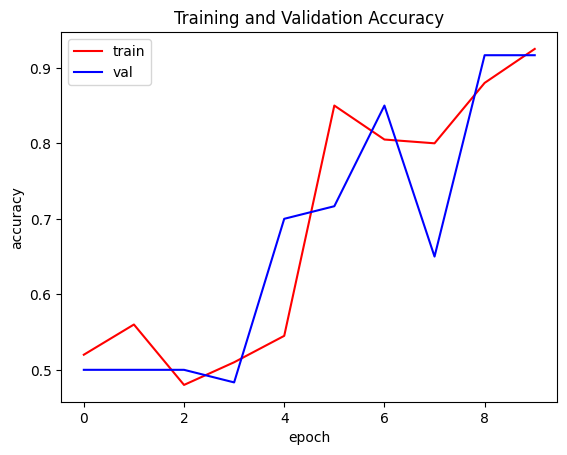

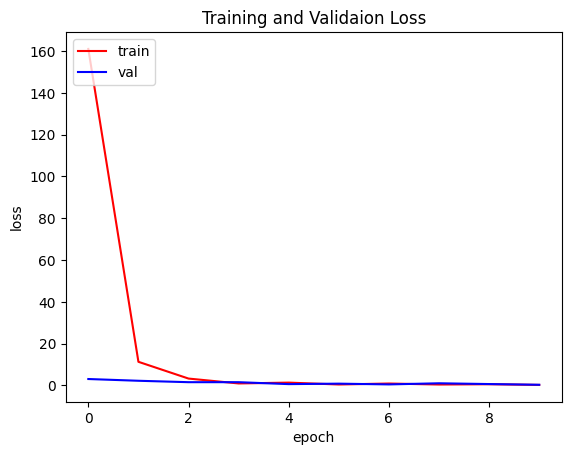

<Figure size 640x480 with 0 Axes>

In [13]:
#Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.
#here it will plot accuracy and loss curve

#loading libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#storing the string of array related to accuracy and loss (Training and Loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#number of epochs == length of array
epochs = range(len(acc))

#define the title and other information for the plotted graph
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [14]:
##assessment of performance on the test set

##loading libraries
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
print("==============TEST RESULTS============")
from sklearn.metrics import confusion_matrix  ##for printing the confusion matrix
y_pred = model_final.predict(testdata)      ##predicting the test data set using trained model i.e. model_final
y_pred = np.argmax(y_pred, axis=1)           
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['normal', 'pneumonia']      ##defining the classes
print(classification_report(testdata.classes, y_pred, target_names=target_names))      ##printing the classification report

==============TEST RESULTS============
3/3 [==============================] - 11s 4s/step
Confusion Matrix
[[22 23]
 [23 22]]
Classification Report
              precision    recall  f1-score   support

      normal       0.49      0.49      0.49        45
   pneumonia       0.49      0.49      0.49        45

    accuracy                           0.49        90
   macro avg       0.49      0.49      0.49        90
weighted avg       0.49      0.49      0.49        90



## Training of Custom CNN model

In [16]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [17]:
# data loading, augmentation is optional
#The flow_from_directory() method takes a path of a directory and generates batches of augmented data
#Generate batches of tensor image data with real-time data augmentation.

##Training data
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="chest_x_ray/traindata",target_size=(224,224))
##Validation data
valdata = ImageDataGenerator()
validationdata = valdata.flow_from_directory(directory="chest_x_ray/validationdata", target_size=(224,224))
##Test data
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="chest_x_ray/testdata", target_size=(224,224))

Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [18]:
# #optional -- Data Augmentation. you can define different augmentation range.


# trdata = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=20,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    horizontal_flip=True)

# traindata = trdata.flow_from_directory(r"C:\Users\Rakesh\Desktop\workshop\chest_x-ray_workshop\chest_x_ray\traindata", 
#                                                target_size=(224, 224), 
#                                                color_mode='rgb',
#                                                batch_size= 16,
#                                                class_mode='categorical',
#                                                shuffle=True) 

In [19]:
##define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME', input_shape=(224, 224, 3)), ##16 filters, kernel of (3,3), Input image is of size (224, 224, 3)
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME'), ##16 filters, kernel of (3,3)
    tf.keras.layers.MaxPooling2D(2,2),    ##maxpooling with kernel size of (2, 2)
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),##32 filters, kernel of (3,3), ReLu Activation
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),##32 filters, kernel of (3,3), ReLu Activation
    tf.keras.layers.MaxPooling2D(2,2),    ##maxpooling with kernel size of (2, 2)
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME'),##64 filters, kernel of (3,3), ReLu Activation
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME'),##64 filters, kernel of (3,3), ReLu Activation
    tf.keras.layers.MaxPooling2D(2,2),    ##maxpooling with kernel size of (2, 2)
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),   
    
    
    tf.keras.layers.Flatten(),                  ###Flattening operation
    tf.keras.layers.Dense(1024, activation='relu'),           ##dense layer with 1024 nodes
    tf.keras.layers.Dropout(0.2),                             ##Dropout of 20% neurons
    tf.keras.layers.Dense(512, activation='relu'),           ##dense layer with 512 nodes
    tf.keras.layers.Dropout(0.2),                          ##Dropout of 20% neurons
    tf.keras.layers.Dense(2, activation='softmax')           ##classification layer with  nodes equal to number of classes
])


model.summary()      ##printing summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                   

In [21]:
#This cell is to define the hyperparameters to train the model.

#optimizer and learning rate. Adam is the optimizer, Learning rate: 1e-3
optimizer = optimizers.legacy.Adam(learning_rate=1e-3)

##compilation of the model with given optimzer. Accuracy is metric on which we can see the performance
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [22]:
#Model fitting. verbose is the choice that how you want to see the output of your Nural Network while it's training. 
#If you set verbose = 0, It will show nothing.
#here you have to give the defined varaibles where data get stored i.e. traindata, validation data
history = model_final.fit(
    traindata,
    epochs=10,
    verbose=1,
    validation_data=validationdata
)

Epoch 1/10
7/7 [==============================] - 38s 5s/step - loss: 0.1766 - accuracy: 0.9300 - val_loss: 0.2953 - val_accuracy: 0.9167
Epoch 2/10
7/7 [==============================] - 39s 6s/step - loss: 0.1367 - accuracy: 0.9550 - val_loss: 0.2431 - val_accuracy: 0.9167
Epoch 3/10
7/7 [==============================] - 37s 6s/step - loss: 0.1061 - accuracy: 0.9650 - val_loss: 0.1349 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 37s 5s/step - loss: 0.1518 - accuracy: 0.9500 - val_loss: 0.1212 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 42s 6s/step - loss: 0.1508 - accuracy: 0.9450 - val_loss: 0.0989 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 41s 6s/step - loss: 0.1762 - accuracy: 0.9550 - val_loss: 0.3130 - val_accuracy: 0.9167
Epoch 7/10
7/7 [==============================] - 39s 6s/step - loss: 0.1168 - accuracy: 0.9700 - val_loss: 0.0958 - val_accuracy: 0.9667
Epoch 8/10
7/7 [==================

<Figure size 640x480 with 0 Axes>

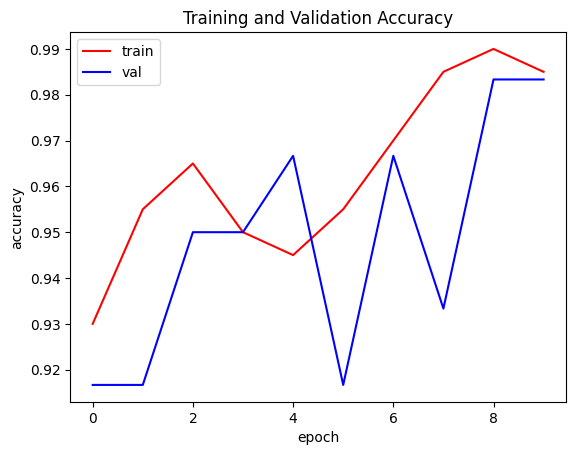

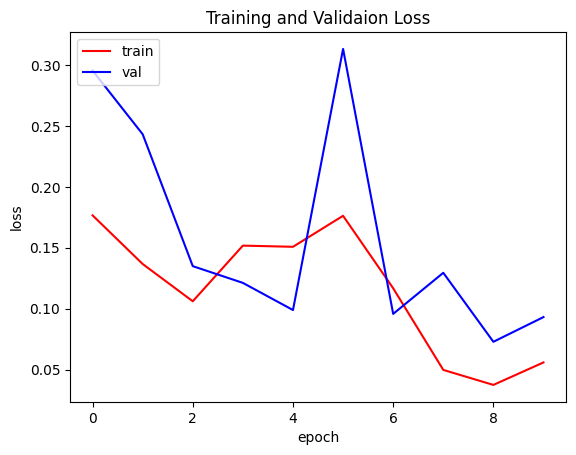

<Figure size 640x480 with 0 Axes>

In [23]:
#Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.
#here it will plot accuracy and loss curve

#loading libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#storing the string of array related to accuracy and loss (Training and Loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#number of epochs == length of array
epochs = range(len(acc))

#define the title and other information for the plotted graph

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
print("==============TEST RESULTS============")
from sklearn.metrics import confusion_matrix  ##for printing the confusion matrix
y_pred = model_final.predict(testdata)      ##predicting the test data set using trained model i.e. model_final
y_pred = np.argmax(y_pred, axis=1)           
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['normal', 'pneumonia']      ##defining the classes
print(classification_report(testdata.classes, y_pred, target_names=target_names))      ##printing the classification report

==============TEST RESULTS============
3/3 [==============================] - 10s 3s/step
Confusion Matrix
[[23 22]
 [20 25]]
Classification Report
              precision    recall  f1-score   support

      normal       0.53      0.51      0.52        45
   pneumonia       0.53      0.56      0.54        45

    accuracy                           0.53        90
   macro avg       0.53      0.53      0.53        90
weighted avg       0.53      0.53      0.53        90

